In [29]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         os.path.join(dirname, filename)

In [30]:
# !pip install keras==2.15.0

In [31]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2



In [32]:
Eczema_dir = r'/kaggle/input/dermnet/train/Eczema Photos'

Atopic_Dermatitis_dir = r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/3. Atopic Dermatitis - 1.25k'
Seborrheic_Keratoses_and_other_Benign_Tumors_dir = r'/kaggle/input/dermnet/train/Seborrheic Keratoses and other Benign Tumors'

filepaths = []
labels = []
dict_list = [Eczema_dir, Atopic_Dermatitis_dir,Seborrheic_Keratoses_and_other_Benign_Tumors_dir ]
class_labels = ['Eczema', 'Atopic Dermatitis','Seborrheic Keratoses and other Benign Tumors']

for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
skin_data = pd.concat([Fseries, Lseries], axis=1)
skin_df = pd.DataFrame(skin_data)
print(skin_df.head())
print(skin_df["labels"].value_counts())

                                           filepaths  labels
0  /kaggle/input/dermnet/train/Eczema Photos/neur...  Eczema
1  /kaggle/input/dermnet/train/Eczema Photos/Dysh...  Eczema
2  /kaggle/input/dermnet/train/Eczema Photos/ecze...  Eczema
3  /kaggle/input/dermnet/train/Eczema Photos/ecze...  Eczema
4  /kaggle/input/dermnet/train/Eczema Photos/stas...  Eczema
labels
Seborrheic Keratoses and other Benign Tumors    1371
Atopic Dermatitis                               1257
Eczema                                          1235
Name: count, dtype: int64


In [33]:
test_Eczema_dir = r'/kaggle/input/dermnet/test/Eczema Photos'

test_Atopic_Dermatitis_dir = r'/kaggle/input/dermnet/test/Atopic Dermatitis Photos'
test_Seborrheic_Keratoses_and_other_Benign_Tumors_dir = r'/kaggle/input/dermnet/test/Seborrheic Keratoses and other Benign Tumors'

test_filepaths = []
test_labels = []
test_dict_list = [test_Eczema_dir, test_Atopic_Dermatitis_dir,test_Seborrheic_Keratoses_and_other_Benign_Tumors_dir ]
class_labels = ['Eczema', 'Atopic Dermatitis','Seborrheic Keratoses and other Benign Tumors']

for i, j in enumerate(test_dict_list):
    flist = os.listdir(j)
    for f in flist:
        test_fpath = os.path.join(j, f)
        test_filepaths.append(test_fpath)
        test_labels.append(class_labels[i])

test_Fseries = pd.Series(test_filepaths, name="filepaths")
test_Lseries = pd.Series(class_labels, name="labels")
test = pd.concat([test_Fseries, test_Lseries], axis=1)
test = pd.DataFrame(test)
print(test.head())
print(test["labels"].value_counts())

                                           filepaths  \
0  /kaggle/input/dermnet/test/Eczema Photos/eczem...   
1  /kaggle/input/dermnet/test/Eczema Photos/eczem...   
2  /kaggle/input/dermnet/test/Eczema Photos/phleb...   
3  /kaggle/input/dermnet/test/Eczema Photos/eczem...   
4  /kaggle/input/dermnet/test/Eczema Photos/eczem...   

                                         labels  
0                                        Eczema  
1                             Atopic Dermatitis  
2  Seborrheic Keratoses and other Benign Tumors  
3                                           NaN  
4                                           NaN  
labels
Eczema                                          1
Atopic Dermatitis                               1
Seborrheic Keratoses and other Benign Tumors    1
Name: count, dtype: int64


In [34]:
# Eczema_dir = r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/1. Eczema 1677'

# Atopic_Dermatitis_dir = r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/3. Atopic Dermatitis - 1.25k'
# Seborrheic_Keratoses_and_other_Benign_Tumors_dir = r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/8. Seborrheic Keratoses and other Benign Tumors - 1.8k'

# filepaths = []
# labels = []
# dict_list = [Eczema_dir, Atopic_Dermatitis_dir,Seborrheic_Keratoses_and_other_Benign_Tumors_dir ]
# class_labels = ['Eczema', 'Atopic Dermatitis','Seborrheic Keratoses and other Benign Tumors']

# for i, j in enumerate(dict_list):
#     flist = os.listdir(j)
#     for f in flist:
#         fpath = os.path.join(j, f)
#         filepaths.append(fpath)
#         labels.append(class_labels[i])

# Fseries = pd.Series(filepaths, name="filepaths")
# Lseries = pd.Series(labels, name="labels")
# skin_data = pd.concat([Fseries, Lseries], axis=1)
# skin_df = pd.DataFrame(skin_data)
# print(skin_df.head())
# print(skin_df["labels"].value_counts())

In [35]:
skin_df["labels"]

0                                             Eczema
1                                             Eczema
2                                             Eczema
3                                             Eczema
4                                             Eczema
                            ...                     
3858    Seborrheic Keratoses and other Benign Tumors
3859    Seborrheic Keratoses and other Benign Tumors
3860    Seborrheic Keratoses and other Benign Tumors
3861    Seborrheic Keratoses and other Benign Tumors
3862    Seborrheic Keratoses and other Benign Tumors
Name: labels, Length: 3863, dtype: object

In [36]:
# train_images, test_images = train_test_split(skin_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(skin_df, test_size=0.2, random_state=42)

In [37]:
print(train_set.shape)

print(val_set.shape)


(3090, 2)
(773, 2)


In [38]:
nb_train_samples =train_set.shape[0]
nb_val_samples =val_set.shape[0]

In [39]:
IMG_SIZE=244

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


# Create ImageDataGenerator with augmentation for training
train_image_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    # Add other augmentations if needed
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
    horizontal_flip=True,
#     fill_mode='nearest'
    brightness_range=[0.8, 1.2]
)

# Create ImageDataGenerator without augmentation for validation
val_image_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
)

# Create training and validation data generators
train_generator = train_image_gen.flow_from_dataframe(
    dataframe=train_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=True  # Shuffle training data
)

val_generator = val_image_gen.flow_from_dataframe(
    dataframe=val_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False  # Do not shuffle validation data
)


Found 3090 validated image filenames belonging to 3 classes.
Found 773 validated image filenames belonging to 3 classes.


In [41]:
# test = val_image_gen.flow_from_dataframe(
#     dataframe=test_images,
#     x_col="filepaths",
#     y_col="labels",
#     target_size=(IMG_SIZE, IMG_SIZE),
#     color_mode='rgb',
#     class_mode="categorical",
#     batch_size=32,
#     shuffle=False  # Do not shuffle test data
# )


In [42]:

# Define test directories
test_Eczema_dir = r'/kaggle/input/dermnet/test/Eczema Photos'
test_Atopic_Dermatitis_dir = r'/kaggle/input/dermnet/test/Atopic Dermatitis Photos'
test_Seborrheic_Keratoses_and_other_Benign_Tumors_dir = r'/kaggle/input/dermnet/test/Seborrheic Keratoses and other Benign Tumors'

# Initialize lists to hold file paths and labels
test_filepaths = []
test_labels = []

# Define directories and corresponding class labels
test_dict_list = [test_Eczema_dir, test_Atopic_Dermatitis_dir, test_Seborrheic_Keratoses_and_other_Benign_Tumors_dir]
class_labels = ['Eczema', 'Atopic Dermatitis', 'Seborrheic Keratoses and other Benign Tumors']

# Populate the lists
for i, j in enumerate(test_dict_list):
    flist = os.listdir(j)
    for f in flist:
        test_fpath = os.path.join(j, f)
        test_filepaths.append(test_fpath)
        test_labels.append(class_labels[i])

# Create DataFrame
test_Fseries = pd.Series(test_filepaths, name="filepaths")
test_Lseries = pd.Series(test_labels, name="labels")
test_df = pd.concat([test_Fseries, test_Lseries], axis=1)

# Display the DataFrame
print(test_df.head())
print(test_df["labels"].value_counts())


                                           filepaths  labels
0  /kaggle/input/dermnet/test/Eczema Photos/eczem...  Eczema
1  /kaggle/input/dermnet/test/Eczema Photos/eczem...  Eczema
2  /kaggle/input/dermnet/test/Eczema Photos/phleb...  Eczema
3  /kaggle/input/dermnet/test/Eczema Photos/eczem...  Eczema
4  /kaggle/input/dermnet/test/Eczema Photos/eczem...  Eczema
labels
Seborrheic Keratoses and other Benign Tumors    343
Eczema                                          309
Atopic Dermatitis                               123
Name: count, dtype: int64


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


# Create ImageDataGenerator for test data
test_image_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
)

# Create test data generator
test = test_image_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col="filepaths",
    y_col="labels",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    class_mode="categorical",  # Set to None if you do not have labels for test data
    batch_size=32,
    shuffle=False  # Do not shuffle test data
)

# Display the first few entries to verify
print(test_df.head())


Found 775 validated image filenames belonging to 3 classes.
                                           filepaths  labels
0  /kaggle/input/dermnet/test/Eczema Photos/eczem...  Eczema
1  /kaggle/input/dermnet/test/Eczema Photos/eczem...  Eczema
2  /kaggle/input/dermnet/test/Eczema Photos/phleb...  Eczema
3  /kaggle/input/dermnet/test/Eczema Photos/eczem...  Eczema
4  /kaggle/input/dermnet/test/Eczema Photos/eczem...  Eczema


In [44]:
classes=list(train_generator.class_indices.keys())
print (classes)

['Atopic Dermatitis', 'Eczema', 'Seborrheic Keratoses and other Benign Tumors']


In [45]:
num_classes = len(classes)

In [46]:
#Callback to save the best model. Using checkpoint and earlystopping to monitor validation accuracy
callbacks_list = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    
    tf.keras.callbacks.ModelCheckpoint(
        filepath='mbNetV2model2.keras',
        monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,verbose=1)
]

In [47]:
from sklearn.utils import class_weight
import numpy as np
train_labels = train_generator.classes

# Number of classes
num_classes = len(classes)


# Extract labels directly from the train_dataset
train_labels = train_generator.classes

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)

# Convert class weights to dictionary
class_weights_dict = dict(enumerate(class_weights))

# Print class weights for reference
print("Class weights:", class_weights_dict)


Class weights: {0: 1.0127826941986233, 1: 1.0607621009268795, 2: 0.9346642468239564}


In [48]:
# os.remove("/kaggle/working/mbNetV2model2.keras")

In [49]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model



# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the early layers of the base model
for layer in base_model.layers[:10]:
    layer.trainable = False

# Build a new model on top of the pre-trained base
inputs = base_model.input
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=val_generator,
                    class_weight=class_weights_dict,
                    callbacks=[callbacks_list])



Epoch 1/100
 1/97 ━━━━━━━━━━━━━━━━━━━━ 1:12:40 45s/step - accuracy: 0.3125 - loss: 1.3801

W0000 00:00:1720392816.846168     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/97 ━━━━━━━━━━━━━━━━━━━━ 51s 792ms/step - accuracy: 0.5532 - loss: 1.0925

W0000 00:00:1720392841.305827     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.6629 - loss: 0.8318

W0000 00:00:1720392856.154601     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.50453, saving model to mbNetV2model2.keras


W0000 00:00:1720392860.602504     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


97/97 ━━━━━━━━━━━━━━━━━━━━ 90s 462ms/step - accuracy: 0.6637 - loss: 0.8298 - val_accuracy: 0.5045 - val_loss: 2.3194 - learning_rate: 0.0010
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.8468 - loss: 0.4021
Epoch 2: val_accuracy improved from 0.50453 to 0.54463, saving model to mbNetV2model2.keras
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 214ms/step - accuracy: 0.8467 - loss: 0.4022 - val_accuracy: 0.5446 - val_loss: 1.6415 - learning_rate: 0.0010
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.8738 - loss: 0.3279
Epoch 3: val_accuracy did not improve from 0.54463
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.8738 - loss: 0.3280 - val_accuracy: 0.4929 - val_loss: 16.4182 - learning_rate: 0.0010
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8971 - loss: 0.2541
Epoch 4: val_accuracy did not improve from 0.54463
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.8971 - loss: 0.2542 - val_accuracy: 0.5369 - val_loss: 32.1371

In [50]:
model.load_weights('mbNetV2model2.keras')

In [51]:
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.8533 - loss: 0.6497
Test Accuracy: 88.65%


W0000 00:00:1720393702.419033     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


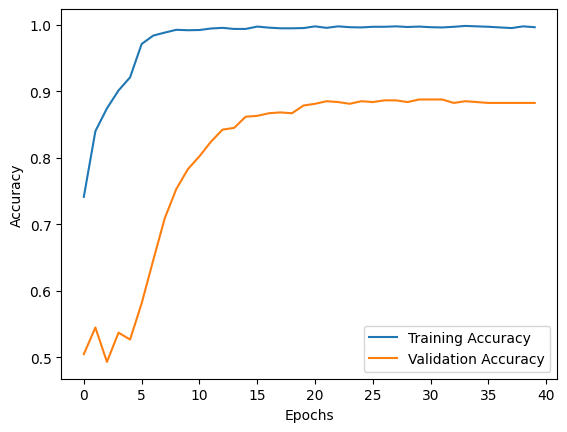

In [52]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

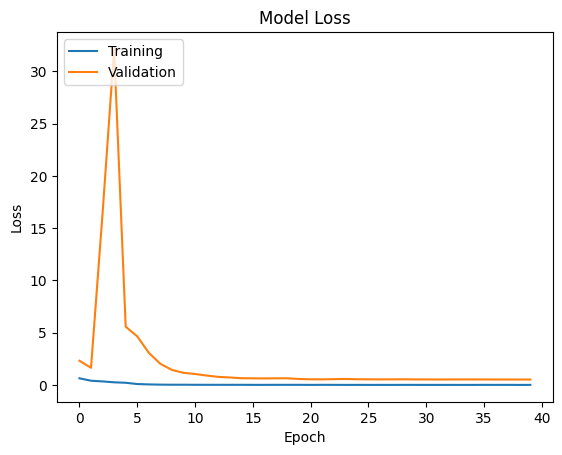

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
pred2 = model.predict(test)
y_pred = np.argmax(pred2, axis=1)
y_true = test.labels

# Classification report
print(classification_report(y_true, y_pred))

# Accuracy score
accuracy = accuracy_score(y_true, y_pred) * 100
print("Accuracy of the Model: {:.1f}%".format(accuracy))

 3/25 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step

W0000 00:00:1720393706.708358     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       123
           1       0.94      0.82      0.87       309
           2       0.92      0.92      0.92       343

    accuracy                           0.89       775
   macro avg       0.86      0.90      0.87       775
weighted avg       0.90      0.89      0.89       775

Accuracy of the Model: 88.6%


W0000 00:00:1720393712.688297     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


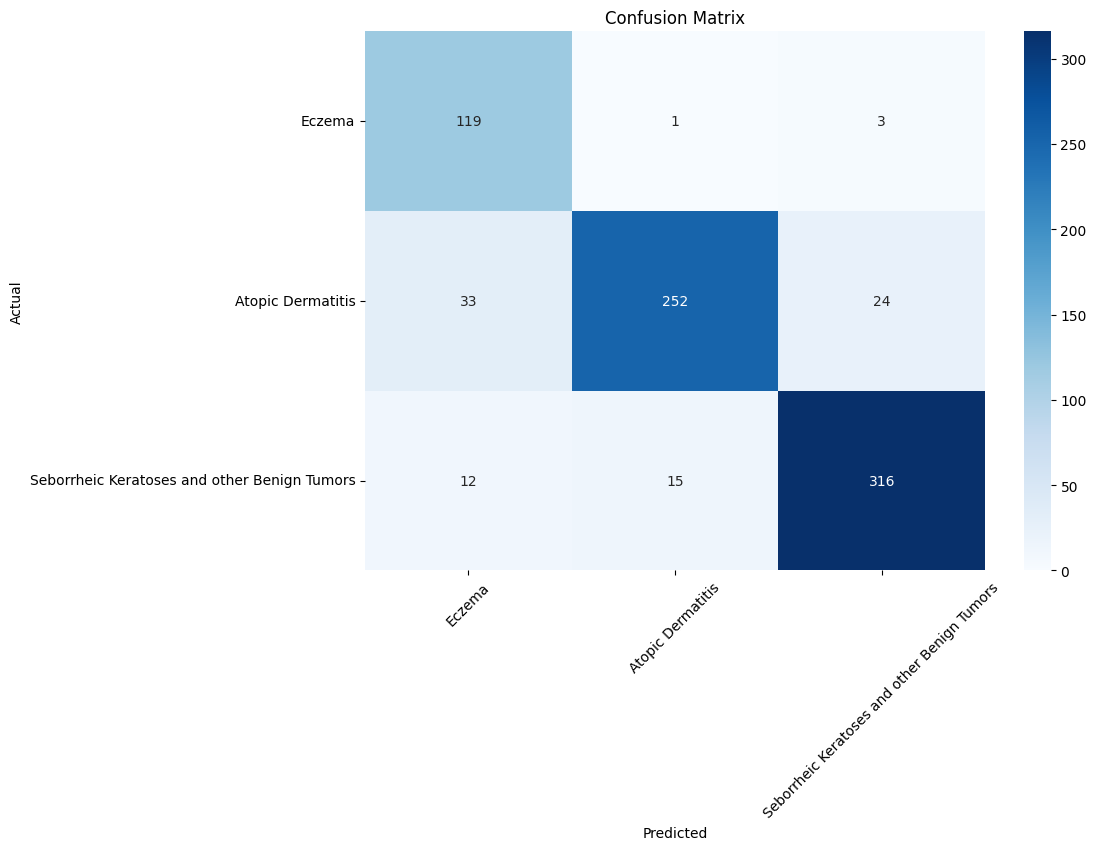

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Set ticks at the center of each class
tick_positions = [i + 0.5 for i in range(len(class_labels))]
plt.xticks(ticks=tick_positions, labels=class_labels, rotation=45)
plt.yticks(ticks=tick_positions, labels=class_labels, rotation=0)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()